In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew,kurtosis
from scipy.special import cbrt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chisquare
from matplotlib import pyplot as plt
from pandas.tools.plotting import table
import os
import pickle
from openpyxl import load_workbook,Workbook
import math

In [2]:
from advanced_analysis_package import analyze

In [3]:
os.chdir('../Input_Data')

In [4]:
df = pd.read_csv('train.csv',header=0)

In [5]:
df.columns

Index(['Symbol', 'Date', 'Series', 'Prev_Close', 'High_1d', 'Low_1d',
       'Last_1d', 'VWAP_1d', 'Volume_1d', 'Turnover_1d',
       ...
       'return_5d_500', 'Voltality_500', 'return_1d', 'return_2d', 'return_3d',
       'return_4d', 'return_5d', 'Voltality', 'Open_1d', 'lift_ind'],
      dtype='object', length=134)

In [6]:
df_train = df.drop(['Symbol','Series','Date'],axis=1)

In [7]:
rename_dict = {col : col.replace('%','pct_') for col in df_train.columns if '%' in col}

In [8]:
rename_dict

{'%Deliverble_1d': 'pct_Deliverble_1d'}

In [9]:
df_train.rename(rename_dict,axis=1,inplace=True)

In [10]:
os.chdir('../pickles')

In [11]:
numerical,categorical = analyze.numerical_categorical_division(df_train)

In [12]:
order = {}
for col in [x for x in numerical if x != 'lift_ind' and 'return' not in x and 'voltality' not in x.lower() and 'pct' not in x]:
    order[col] = len(str(max(df_train[col].astype(int))))

In [13]:
order

{'Prev_Close': 5,
 'High_1d': 5,
 'Low_1d': 5,
 'Last_1d': 5,
 'VWAP_1d': 5,
 'Volume_1d': 9,
 'Turnover_1d': 11,
 'Trades_1d': 7,
 'Deliverable_Volume_1d': 9,
 'Open_nifty_1d': 5,
 'High_nifty_1d': 5,
 'Low_nifty_1d': 5,
 'Close_nifty_1d': 5,
 'Volume_nifty_1d': 9,
 'Turnover_nifty_1d': 11,
 'Open_auto_1d': 5,
 'High_auto_1d': 5,
 'Low_auto_1d': 5,
 'Close_auto_1d': 5,
 'Open_bank_1d': 5,
 'High_bank_1d': 5,
 'Low_bank_1d': 5,
 'Close_bank_1d': 5,
 'Open_fmcg_1d': 5,
 'High_fmcg_1d': 5,
 'Low_fmcg_1d': 5,
 'Close_fmcg_1d': 5,
 'Open_it_1d': 5,
 'High_it_1d': 5,
 'Low_it_1d': 5,
 'Close_it_1d': 5,
 'Open_media_1d': 4,
 'High_media_1d': 4,
 'Low_media_1d': 4,
 'Close_media_1d': 4,
 'Open_metal_1d': 4,
 'High_metal_1d': 4,
 'Low_metal_1d': 4,
 'Close_metal_1d': 4,
 'Open_pharma_1d': 5,
 'High_pharma_1d': 5,
 'Low_pharma_1d': 5,
 'Close_pharma_1d': 5,
 'Open_realty_1d': 3,
 'High_realty_1d': 3,
 'Low_realty_1d': 3,
 'Close_realty_1d': 3,
 'Open_psu_1d': 4,
 'High_psu_1d': 4,
 'Low_psu_1d'

In [14]:
pickle.dump(order,open('order.pickle','wb'))

In [15]:
rename_dict={}
for col in order.keys():
    df_train[col]=df_train[col]/10**order[col]
    rename_dict[col] = col+"_order{}".format(order[col])

In [16]:
rename_dict

{'Prev_Close': 'Prev_Close_order5',
 'High_1d': 'High_1d_order5',
 'Low_1d': 'Low_1d_order5',
 'Last_1d': 'Last_1d_order5',
 'VWAP_1d': 'VWAP_1d_order5',
 'Volume_1d': 'Volume_1d_order9',
 'Turnover_1d': 'Turnover_1d_order11',
 'Trades_1d': 'Trades_1d_order7',
 'Deliverable_Volume_1d': 'Deliverable_Volume_1d_order9',
 'Open_nifty_1d': 'Open_nifty_1d_order5',
 'High_nifty_1d': 'High_nifty_1d_order5',
 'Low_nifty_1d': 'Low_nifty_1d_order5',
 'Close_nifty_1d': 'Close_nifty_1d_order5',
 'Volume_nifty_1d': 'Volume_nifty_1d_order9',
 'Turnover_nifty_1d': 'Turnover_nifty_1d_order11',
 'Open_auto_1d': 'Open_auto_1d_order5',
 'High_auto_1d': 'High_auto_1d_order5',
 'Low_auto_1d': 'Low_auto_1d_order5',
 'Close_auto_1d': 'Close_auto_1d_order5',
 'Open_bank_1d': 'Open_bank_1d_order5',
 'High_bank_1d': 'High_bank_1d_order5',
 'Low_bank_1d': 'Low_bank_1d_order5',
 'Close_bank_1d': 'Close_bank_1d_order5',
 'Open_fmcg_1d': 'Open_fmcg_1d_order5',
 'High_fmcg_1d': 'High_fmcg_1d_order5',
 'Low_fmcg_1d': 

In [17]:
df_train.rename(rename_dict,axis=1,inplace=True)

In [18]:
numerical,categorical = analyze.numerical_categorical_division(df_train)

In [19]:
pickle.dump(numerical,open('numerical.pickle','wb'))
pickle.dump(categorical,open('categorical.pickle','wb'))

In [20]:
edd_df = analyze.edd(df_train,dv='lift_ind',regression=False)

In [21]:
edd_df

,Var,type,count,nmiss,missing_rate,unique,std,skewness,kurtosis,mean,...,p5,p10,p50,p90,p95,p99,mean+2sigma,mean+3sigma,max,correlation/p_value
0,Prev_Close_order5,numeric,85799,0,0.0,40149,0.027475,7.094109,63.574735,0.013702,...,0.00151,0.0020525,0.0065965,0.0282402,0.038123,0.167294,0.068652,0.096128,0.328619,4.896939e-02
1,High_1d_order5,numeric,85799,0,0.0,33009,0.027833,7.093108,63.505373,0.013880,...,0.00153695,0.0020864,0.00669,0.0285796,0.0385704,0.170477,0.069546,0.097380,0.3348,4.528812e-02
2,Low_1d_order5,numeric,85799,0,0.0,34474,0.027137,7.099734,63.726008,0.013529,...,0.001488,0.0020205,0.006501,0.0279366,0.0377141,0.16508,0.067804,0.094942,0.324681,4.919718e-02
3,Last_1d_order5,numeric,85799,0,0.0,32316,0.027468,7.093875,63.576753,0.013700,...,0.00151095,0.002054,0.0065955,0.0282252,0.0381022,0.167014,0.068635,0.096102,0.32849,5.001340e-02
4,VWAP_1d_order5,numeric,85799,0,0.0,68264,0.027483,7.094506,63.586795,0.013706,...,0.0015111,0.00205478,0.0066003,0.0282495,0.0381505,0.167402,0.068671,0.096154,0.329752,4.740273e-02
5,Volume_1d_order9,numeric,85799,0,0.0,84982,0.005628,12.911713,434.523278,0.003206,...,5.92005e-05,0.000163064,0.00162097,0.00767185,0.0114072,0.0229038,0.014462,0.020090,0.293553,2.766714e-03
6,Turnover_1d_order11,numeric,85799,0,0.0,85799,2394.152393,22.751982,1667.818691,1692.340335,...,100.646,228.527,1071.27,3716.94,5038.07,9335.92,6480.645122,8874.797515,248177,1.275867e-04
7,Trades_1d_order7,numeric,85799,0,0.0,59307,0.004494,4.346556,71.941654,0.004989,...,0.00047965,0.00098946,0.0038958,0.0100729,0.0127184,0.0200867,0.013977,0.018470,0.178827,2.889176e-05
8,Deliverable_Volume_1d_order9,numeric,85799,0,0.0,84222,0.002803,18.772913,943.429345,0.001593,...,3.06933e-05,7.8866e-05,0.000836182,0.00380612,0.00551424,0.0108717,0.007199,0.010002,0.216378,1.218772e-01
9,pct_Deliverble_1d,numeric,85799,0,0.0,8168,0.163939,-0.232357,2.587533,0.531297,...,0.2406,0.3017,0.5445,0.7344,0.7796,0.8712,0.859175,1.023115,0.9905,1.372019e-07


In [22]:
os.chdir('../Statistics')

In [23]:
wb = Workbook()
wb.save('report.xlsx')

In [24]:
wb = load_workbook('report.xlsx')
writer = pd.ExcelWriter('report.xlsx')
edd_df.to_excel(writer,sheet_name='edd_v01',index=False)

In [25]:
writer.close()

In [42]:
os.chdir('../Graphs/')

/home/ubuntu/Desktop/Trading App/Probability Prediction/Codes/advanced_analysis_package/analyze.py:124: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
  table(ax, f)


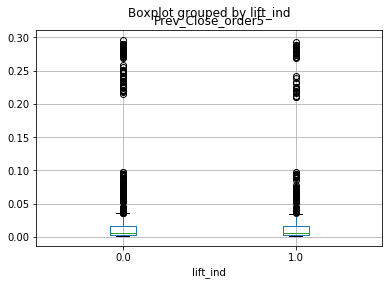

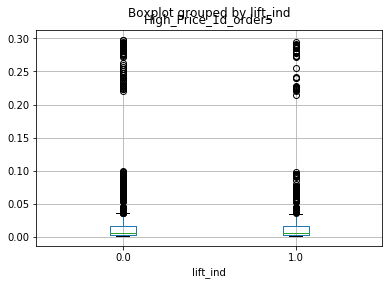

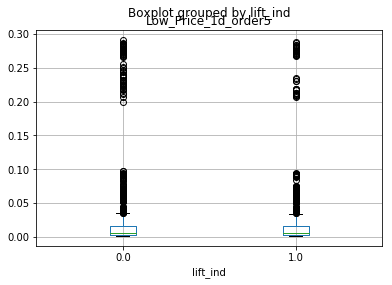

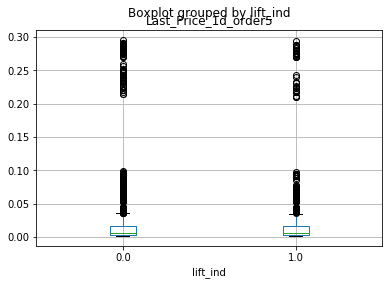

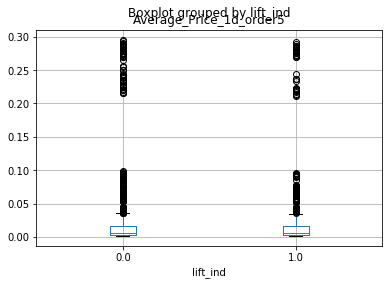

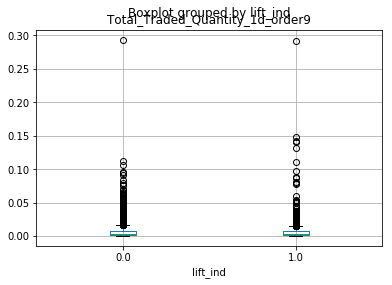

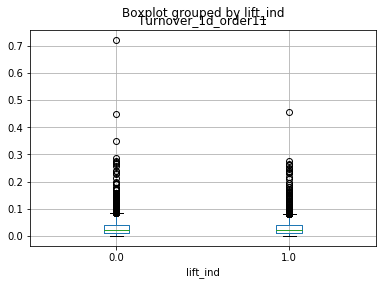

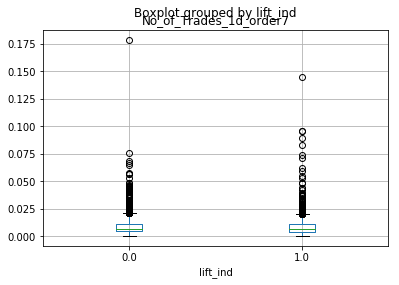

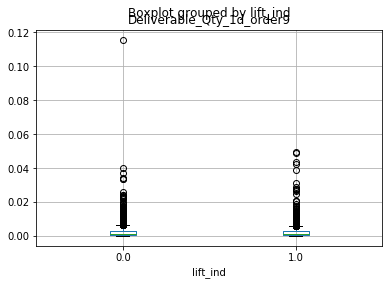

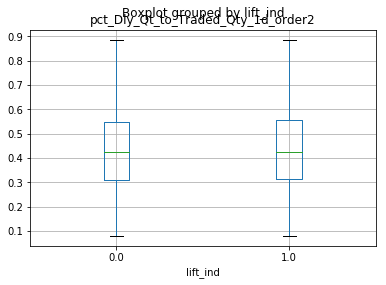

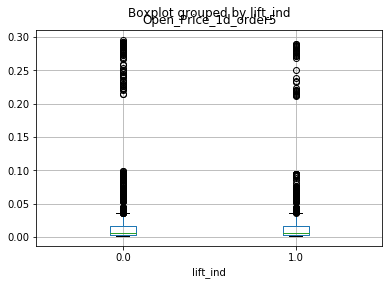

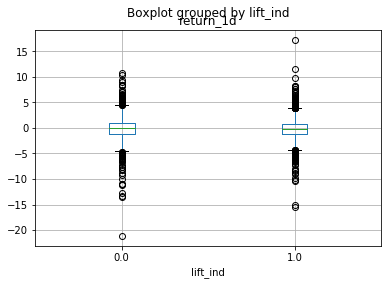

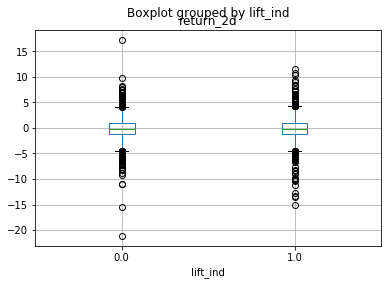

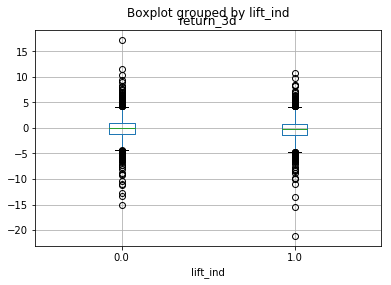

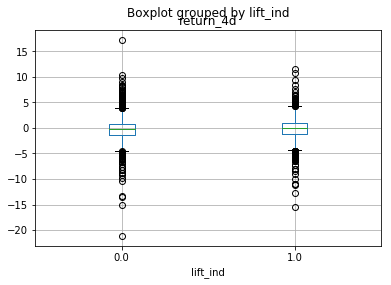

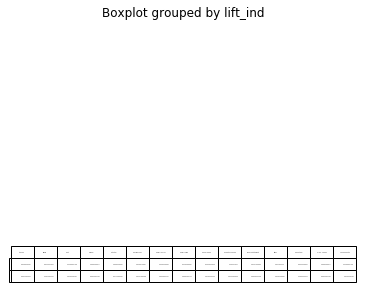

In [29]:
analyze.graphical_analysis(data=df_train,dv='lift_ind',regression=False,path='')

In [26]:
os.chdir('../Statistics/')

In [27]:
transform_dict = {'log':lambda x: np.log(x),'sqr':lambda x: x**2,'sqrt':lambda x: np.sqrt(x),'exp':lambda x:np.exp(x),
                 'cube':lambda x: x**3,'cuberoot': lambda x: cbrt(x)}

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import skew,kurtosis
from scipy.special import cbrt

In [29]:
def transformations(data,iv,dv,cat_ratio):
    numerical,categorical = analyze.numerical_categorical_division(data)
    if iv in numerical and iv != dv:
        if len(list(data[iv].value_counts())) <= cat_ratio*data.shape[0]:
            return 'categorical'
        else:
            transformations = []
            data_new = data[[iv,dv]].dropna(how='any',axis=0)
            mod = ols(iv+' ~ '+ dv,data=data_new).fit()
            aov_table = sm.stats.anova_lm(mod,type=2)
            p_value_benchmak = aov_table.loc[dv,'PR(>F)']
            if edd_df.loc[edd_df['Var']==iv,'skewness'].values[0] >0:
                transform_keys = ['log','sqrt','cuberoot']
            else:
                transform_keys = ['sqr','cube','exp']
            for t in transform_keys:
                try:
                    data_new[iv] = data_new[iv].apply(transform_dict[t])
                    if data_new[data_new[iv].isin([float('inf'),-float('inf'),np.nan])].shape[0]==0:
                        mod = ols(iv+' ~ '+ dv,data=data_new).fit()
                        aov_table = sm.stats.anova_lm(mod,type=2)
                        p_value = aov_table.loc[dv,'PR(>F)']
                        if p_value < p_value_benchmak:
                            transformations.append(t)
                except Exception as e:
                    print(iv,t)
                    print(e)
            return ','.join(transformations)
    else:
        return None

In [30]:
edd_df['conversions'] = edd_df['Var'].apply(lambda x:transformations(df_train,x,'lift_ind',.01))

In [35]:
edd_df

,Var,type,count,nmiss,missing_rate,unique,std,skewness,kurtosis,mean,...,p10,p50,p90,p95,p99,mean+2sigma,mean+3sigma,max,correlation/p_value,conversions
0,Prev_Close_order5,numeric,4850,0,0.0,4413,0.037851,5.487115,35.613572,0.016919,...,0.002101,0.00641825,0.0287193,0.0620681,0.270099,0.092621,0.130472,0.296637,0.038340,
1,High_Price_1d_order5,numeric,4850,0,0.0,4157,0.038511,5.487744,35.565092,0.017187,...,0.0021489,0.00651575,0.0292785,0.0628955,0.273245,0.094210,0.132721,0.298,0.038055,
2,Low_Price_1d_order5,numeric,4850,0,0.0,4240,0.037301,5.491693,35.717783,0.016677,...,0.0020477,0.0063405,0.0284016,0.0611182,0.268023,0.091279,0.128580,0.29172,0.040042,
3,Last_Price_1d_order5,numeric,4850,0,0.0,4179,0.037845,5.487982,35.625802,0.016916,...,0.0021,0.00641575,0.0287329,0.0619825,0.270204,0.092606,0.130451,0.2958,0.038368,
4,Average_Price_1d_order5,numeric,4850,0,0.0,4740,0.037889,5.488108,35.626883,0.016931,...,0.00210063,0.00641865,0.0288255,0.0616452,0.270234,0.092709,0.130598,0.295652,0.038895,
5,Total_Traded_Quantity_1d_order9,numeric,4850,0,0.0,4849,0.011339,10.314298,198.869432,0.006285,...,0.000530129,0.00324181,0.0142091,0.0207274,0.0447218,0.028962,0.040300,0.293553,0.463145,
6,Turnover_1d_order11,numeric,4850,0,0.0,4850,0.035512,4.465523,48.682461,0.032734,...,0.00751955,0.0213559,0.0721944,0.0953539,0.1584,0.103759,0.139271,0.721272,0.095614,
7,No_of_Trades_1d_order7,numeric,4850,0,0.0,4782,0.007880,6.017358,83.921602,0.008755,...,0.00277715,0.00692905,0.0160622,0.0203237,0.0376269,0.024516,0.032397,0.178827,0.601963,log
8,Deliverable_Qty_1d_order9,numeric,4850,0,0.0,4845,0.003890,8.748842,176.796376,0.002463,...,0.000200284,0.00138256,0.00542753,0.00842899,0.0162484,0.010242,0.014132,0.115741,0.261500,
9,pct_Dly_Qt_to_Traded_Qty_1d_order2,numeric,4850,0,0.0,3268,0.154272,0.148062,2.251597,0.433085,...,0.2339,0.42585,0.64281,0.689955,0.760551,0.741630,0.895902,0.8861,0.768234,


In [31]:
wb = load_workbook('report.xlsx')
writer = pd.ExcelWriter('report.xlsx')
edd_df.to_excel(writer,sheet_name='edd_v01',index=False)
writer.close()

In [32]:
os.chdir('../output_data')

In [33]:
for col in numerical:
    applied = edd_df.loc[edd_df['Var']==col,'conversions'].values[0]
    if applied != '' and applied != 'categorical':
        try:
            for t in applied.split(','):
                df_train[col+'_'+t] = df_train[col].apply(transform_dict[t])
        except:
            pass

In [34]:
df_train.to_csv('train_v01.csv',index=False)

In [35]:
df_train

,Prev_Close_order5,High_1d_order5,Low_1d_order5,Last_1d_order5,VWAP_1d_order5,Volume_1d_order9,Turnover_1d_order11,Trades_1d_order7,Deliverable_Volume_1d_order9,pct_Deliverble_1d,...,return_2d_realty_cube,return_3d_realty_cube,Voltality_psu_log,return_1d_500_sqr,return_1d_500_cube,return_2d_500_sqr,return_2d_500_cube,return_3d_500_sqr,return_3d_500_cube,Voltality_500_log
0,0.001277,0.001288,0.001243,0.001270,0.001264,0.001037,131.073599,0.001166,0.000401,0.3872,...,-4.117022,-0.039136,0.543955,0.119906,0.041520,0.001540,0.000060,0.088097,-0.026148,-0.131353
1,0.001273,0.001298,0.001262,0.001265,0.001272,0.000066,8.336131,0.000100,0.000012,0.1869,...,-0.025689,-4.117022,0.539359,0.003077,0.000171,0.119906,0.041520,0.001540,0.000060,-0.151476
2,0.001322,0.001334,0.001260,0.001320,0.001294,0.000848,109.804318,0.001013,0.000492,0.5795,...,0.113198,-0.025689,-2.136427,0.007724,0.000679,0.003077,0.000171,0.119906,0.041520,-1.586059
3,0.001364,0.001370,0.001329,0.001363,0.001357,0.000870,117.990538,0.001333,0.000476,0.5478,...,5.006991,0.113198,0.313708,3.371296,6.190065,0.007724,0.000679,0.003077,0.000171,-0.370138
4,0.001371,0.001407,0.001347,0.001357,0.001373,0.001811,248.579874,0.001645,0.000800,0.4418,...,106.879314,5.006991,0.297382,0.112121,0.037543,3.371296,6.190065,0.007724,0.000679,-0.410858
5,0.001326,0.001375,0.001312,0.001316,0.001332,0.001749,232.997317,0.001043,0.001030,0.5888,...,79.091045,106.879314,0.254709,0.005445,0.000402,0.112121,0.037543,3.371296,6.190065,-0.375587
6,0.001316,0.001330,0.001296,0.001318,0.001319,0.001100,145.081642,0.001232,0.000596,0.5422,...,0.023745,79.091045,0.285644,0.117966,0.040517,0.005445,0.000402,0.112121,0.037543,-0.414538
7,0.001355,0.001364,0.001307,0.001364,0.001335,0.002061,275.011099,0.001181,0.001105,0.5362,...,5.243248,0.023745,0.131758,0.220120,0.103274,0.117966,0.040517,0.005445,0.000402,-0.468900
8,0.001400,0.001410,0.001350,0.001401,0.001381,0.001636,226.007351,0.001837,0.001004,0.6138,...,0.000000,5.243248,-0.408629,1.690044,2.197086,0.220120,0.103274,0.117966,0.040517,-0.871872
9,0.001417,0.001438,0.001387,0.001430,0.001412,0.000891,125.798609,0.001561,0.000405,0.4547,...,40.227585,0.000000,-0.089636,0.376012,-0.230570,1.690044,2.197086,0.220120,0.103274,-0.479972
